#Principles of Data Science Coursework: A Tiny Data Science Project

In [2]:
#DATA PRE-PROCESSING

In [3]:
#Loading the datasets and merging the Crime Data from the Metropolitan Police

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())

crimeMet = pd.read_csv('2019-06-metropolitan-street.csv')

C:\Users\dimin


In [5]:
#Transforming the new merged dataset, by pivoting wider to allow for easier manipulation of the dataset

In [6]:
crime_counts = crimeMet.groupby('LSOA code')['Crime type'].nunique().reset_index(name='Count')
CrimeData_with_counts = pd.merge(crimeMet, crime_counts, on='LSOA code', how='left')
CrimeData_with_counts.to_csv('CrimeData_with_counts.csv', index=False)

In [7]:
aggregated_CrimeData = CrimeData_with_counts.groupby(['Count', 'Crime type', 'LSOA code']).size().reset_index(name='Total')
aggregated_CrimeData.to_csv('aggregated_CrimeData.csv', index=False)

In [8]:
pivot_CrimeData = aggregated_CrimeData.pivot_table(index='LSOA code', 
                                         columns='Crime type', 
                                         values='Total', 
                                         fill_value=0)
pivot_CrimeData.to_csv('pivot_CrimeData.csv', index=True)

In [9]:
pivot_CrimeData['Total Crimes'] = pivot_CrimeData.sum(axis=1)
pivot_CrimeData.to_csv('pivot_CrimeData.csv', index=True)
print(pivot_CrimeData.head())

Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
LSOA code                                                    
E01000001                       0              1         0   
E01000002                       0              0         0   
E01000005                       3              0         0   
E01000006                       2              0         1   
E01000007                      14              0         3   

Crime type  Criminal damage and arson  Drugs  Other crime  Other theft  \
LSOA code                                                                
E01000001                           0      0            0            1   
E01000002                           0      0            0            2   
E01000005                           0      0            0            5   
E01000006                           1      0            1            0   
E01000007                           0      7            0            4   

Crime type  Possession of weapons  Public orde

In [10]:
#Loading the Index of Multiple Deprivation Data for London 2019 obtained from opendata.arcgis.com: Indices of Multiple Deprivation 
#(IMD) 2019

In [11]:
DeprivationData = pd.read_csv('imd_2019_england_scores.csv')

In [12]:
#Merging the two datasets to allow for more efficient manipulation of both datasets. The two datasets are inner joined on the LSOA code column.

In [13]:
import pandas as pd

CrimeData_final = pd.read_csv('CrimeData_final.csv')
DeprivationData = pd.read_csv('imd_2019_england_scores.csv')

FinalData = pd.merge(CrimeData_final, DeprivationData, on='LSOA code', how='inner')
FinalData.to_csv('FinalData.csv', index=True)

In [14]:
columns_to_remove = ['HDDScore', 'CriScore', 'BHSScore', 'EnvScore', 'IDCScore', 'IDOScore', 'CYPScore', 'GBScore', 'WBScore', 'IndScore', 'OutScore', 'lsoa11nm']
FinalData = FinalData.drop(columns=columns_to_remove)
FinalData.to_csv('FinalData.csv', index=True)

In [15]:
print(FinalData.head())

   LSOA code  Anti-social behaviour  Bicycle theft  Burglary  \
0  E01000001                      0              1         0   
1  E01000002                      0              0         0   
2  E01000005                      3              0         0   
3  E01000006                      2              0         1   
4  E01000007                     14              0         3   

   Criminal damage and arson  Drugs  Other crime  Other theft  \
0                          0      0            0            1   
1                          0      0            0            2   
2                          0      0            0            5   
3                          1      0            1            0   
4                          0      7            0            4   

   Possession of weapons  Public order  ...  Vehicle crime  \
0                      0             0  ...              0   
1                      0             0  ...              0   
2                      0             0

In [16]:
#1st Question:
#Are there significant differences in crime rates or types between areas ranked higher and lower in specific aspects of deprivation, such as income, employment, or education? 
#For example, do areas with higher rankings (indicating more deprivation) in income or employment deprivation show higher rates or different types of crimes compared to areas with lower rankings?

In [17]:
#Exploratory Data Analysis (EDA)

In [18]:
print(FinalData.describe(include='all'))

        LSOA code  Anti-social behaviour  Bicycle theft     Burglary  \
count        5017            5017.000000    5017.000000  5017.000000   
unique       5017                    NaN            NaN          NaN   
top     E01000001                    NaN            NaN          NaN   
freq            1                    NaN            NaN          NaN   
mean          NaN               4.399243       0.378314     1.253538   
std           NaN               5.796546       1.108180     1.704992   
min           NaN               0.000000       0.000000     0.000000   
25%           NaN               1.000000       0.000000     0.000000   
50%           NaN               3.000000       0.000000     1.000000   
75%           NaN               6.000000       0.000000     2.000000   
max           NaN             142.000000      34.000000    34.000000   

        Criminal damage and arson        Drugs  Other crime  Other theft  \
count                 5017.000000  5017.000000  5017.000000

Text(0, 0.5, 'Crime Type')

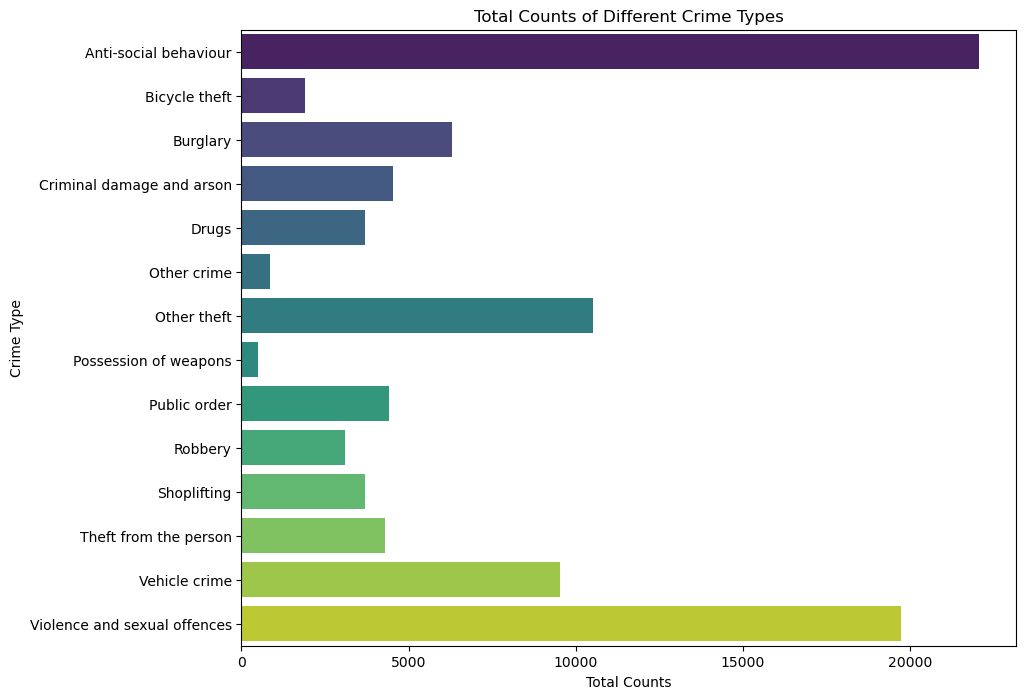

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

crime_counts = FinalData[['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson',
                     'Drugs', 'Other crime', 'Other theft', 'Possession of weapons', 'Public order',
                     'Robbery', 'Shoplifting', 'Theft from the person', 'Vehicle crime',
                     'Violence and sexual offences']].sum()

crime_counts_df = pd.DataFrame(crime_counts, columns=['Total']).reset_index()
crime_counts_df.rename(columns={'index': 'Crime Type'}, inplace=True)

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Total', y='Crime Type', data=crime_counts_df, palette="viridis")
plt.title('Total Counts of Different Crime Types')
plt.xlabel('Total Counts')
plt.ylabel('Crime Type')

In [20]:
#As seen from the bar chart plotted above, the most frequent crime type is Anti-Social Behaviour, whilst the least frequent is
#weapon possesion.

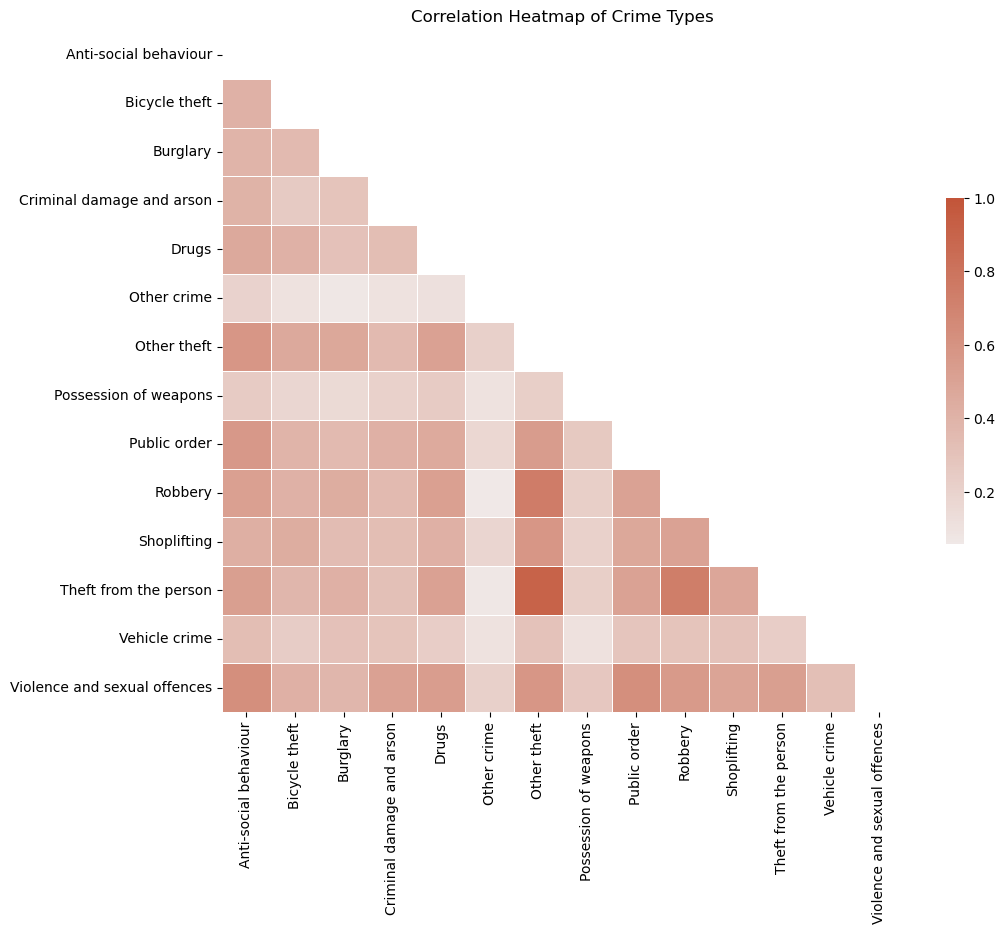

In [21]:
import numpy as np

crime_types = [
    'Anti-social behaviour', 'Bicycle theft', 'Burglary', 
    'Criminal damage and arson', 'Drugs', 'Other crime', 
    'Other theft', 'Possession of weapons', 'Public order', 
    'Robbery', 'Shoplifting', 'Theft from the person', 
    'Vehicle crime', 'Violence and sexual offences'
]
crime_data_selected = CrimeData_final[crime_types]
corr_matrix = crime_data_selected.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Crime Types')
plt.show()

In [22]:
#This is a correlation heatmap between the types of crimes.

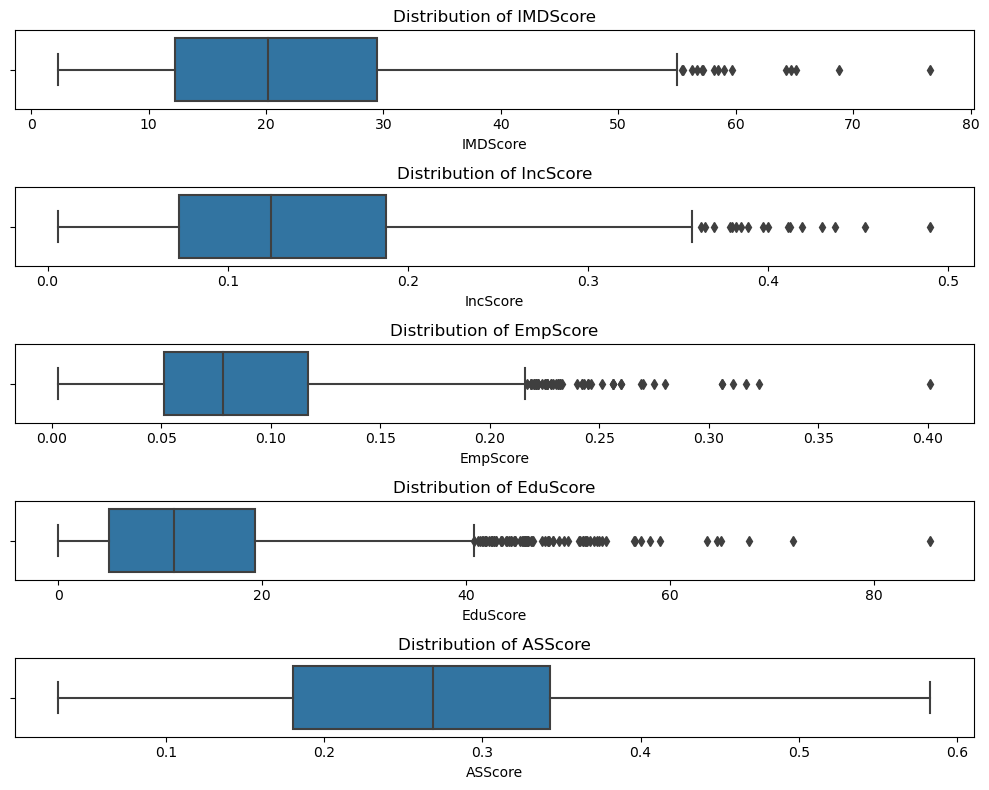

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score_columns = ['IMDScore', 'IncScore', 'EmpScore', 'EduScore', 'ASScore']
plt.figure(figsize=(10, 8))
for i, col in enumerate(score_columns):
    plt.subplot(len(score_columns), 1, i+1)
    sns.boxplot(x=col, data=FinalData)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

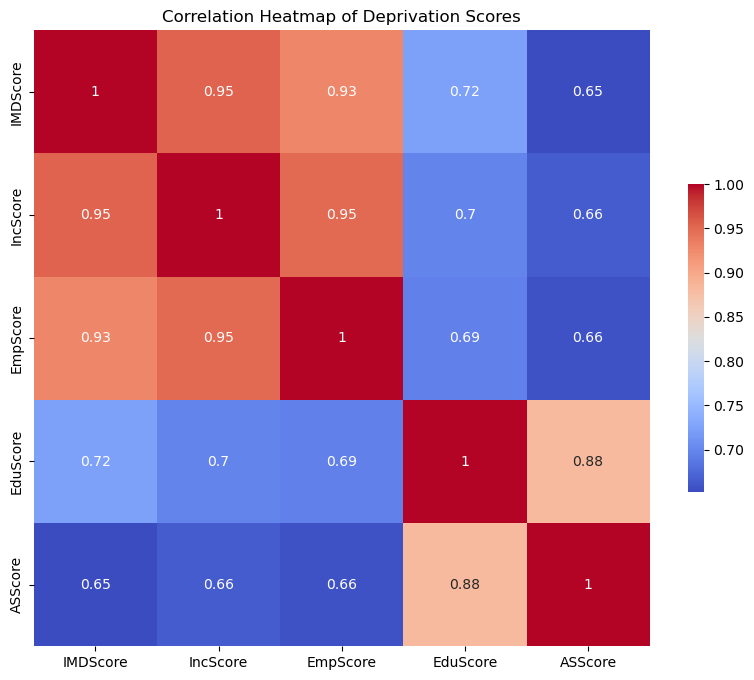

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score_columns = ['IMDScore', 'IncScore', 'EmpScore', 'EduScore', 'ASScore']
corr_matrix = FinalData[score_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Deprivation Scores')
plt.show()

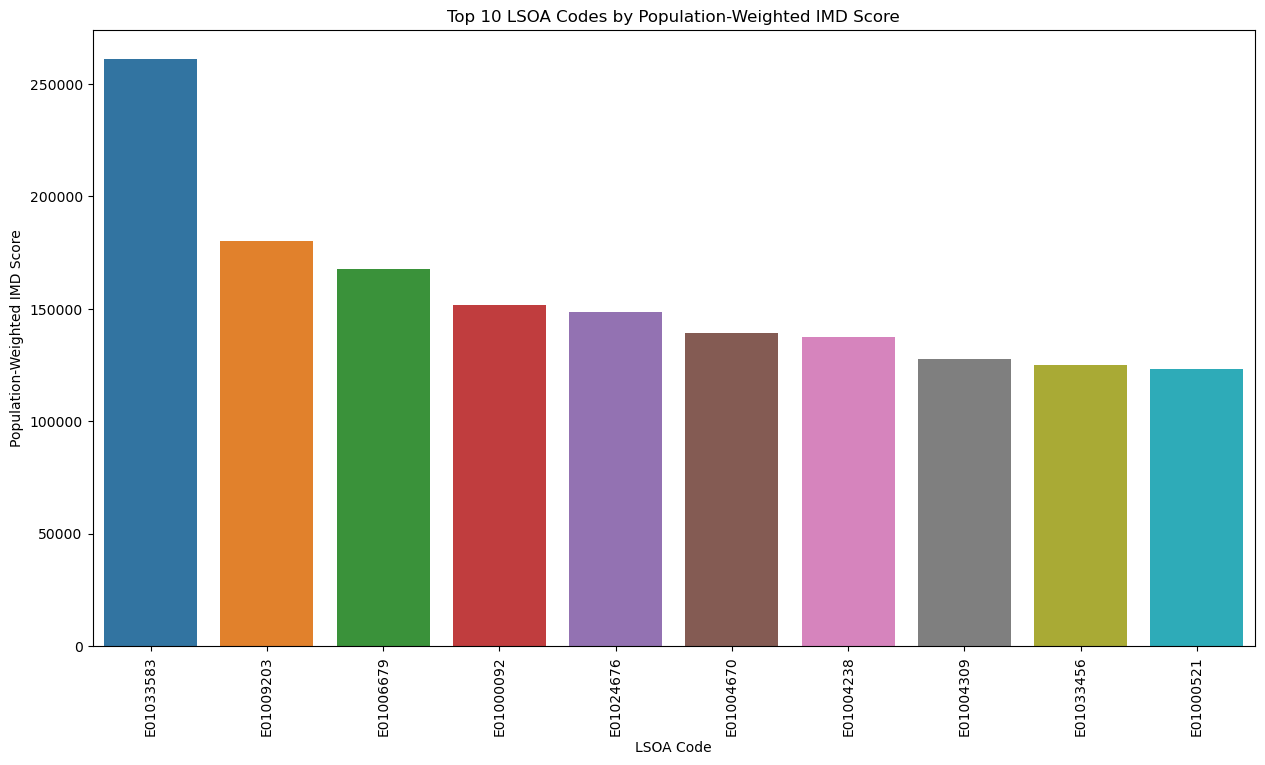

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FinalData['PopWeightedScore'] = FinalData['IMDScore'] * FinalData['TotPop']

N = 10  
top_data = FinalData.sort_values(by='PopWeightedScore', ascending=False).head(N)

plt.figure(figsize=(15, 8))
sns.barplot(x='LSOA code', y='PopWeightedScore', data=top_data)
plt.title(f'Top {N} LSOA Codes by Population-Weighted IMD Score')
plt.ylabel('Population-Weighted IMD Score')
plt.xlabel('LSOA Code')
plt.xticks(rotation=90)
plt.show()

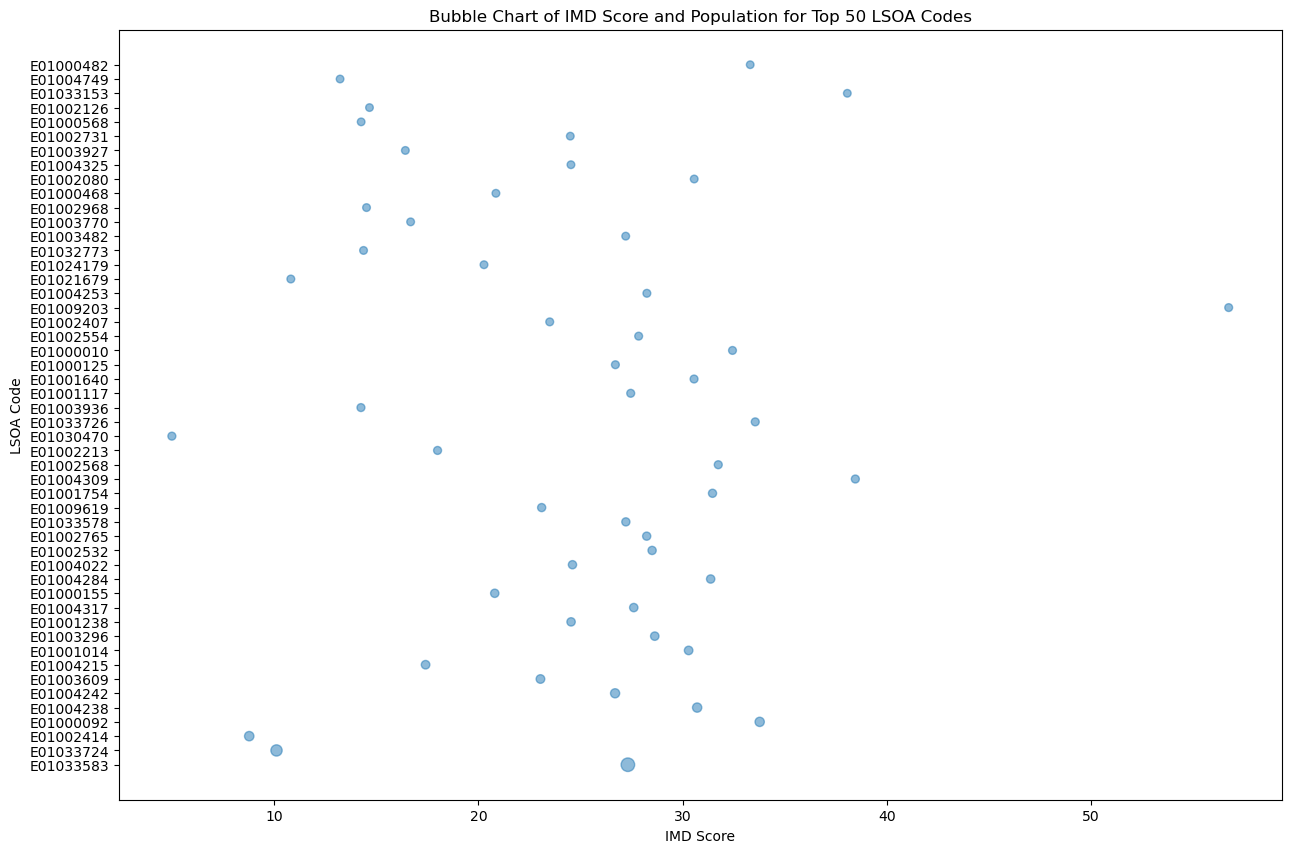

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

top_50_data = FinalData.nlargest(50, 'TotPop')

plt.figure(figsize=(15, 10))

plt.scatter(top_50_data['IMDScore'], top_50_data['LSOA code'], s=top_50_data['TotPop'] / 100, alpha=0.5)

plt.xlabel('IMD Score')
plt.ylabel('LSOA Code')
plt.title('Bubble Chart of IMD Score and Population for Top 50 LSOA Codes')

plt.show()

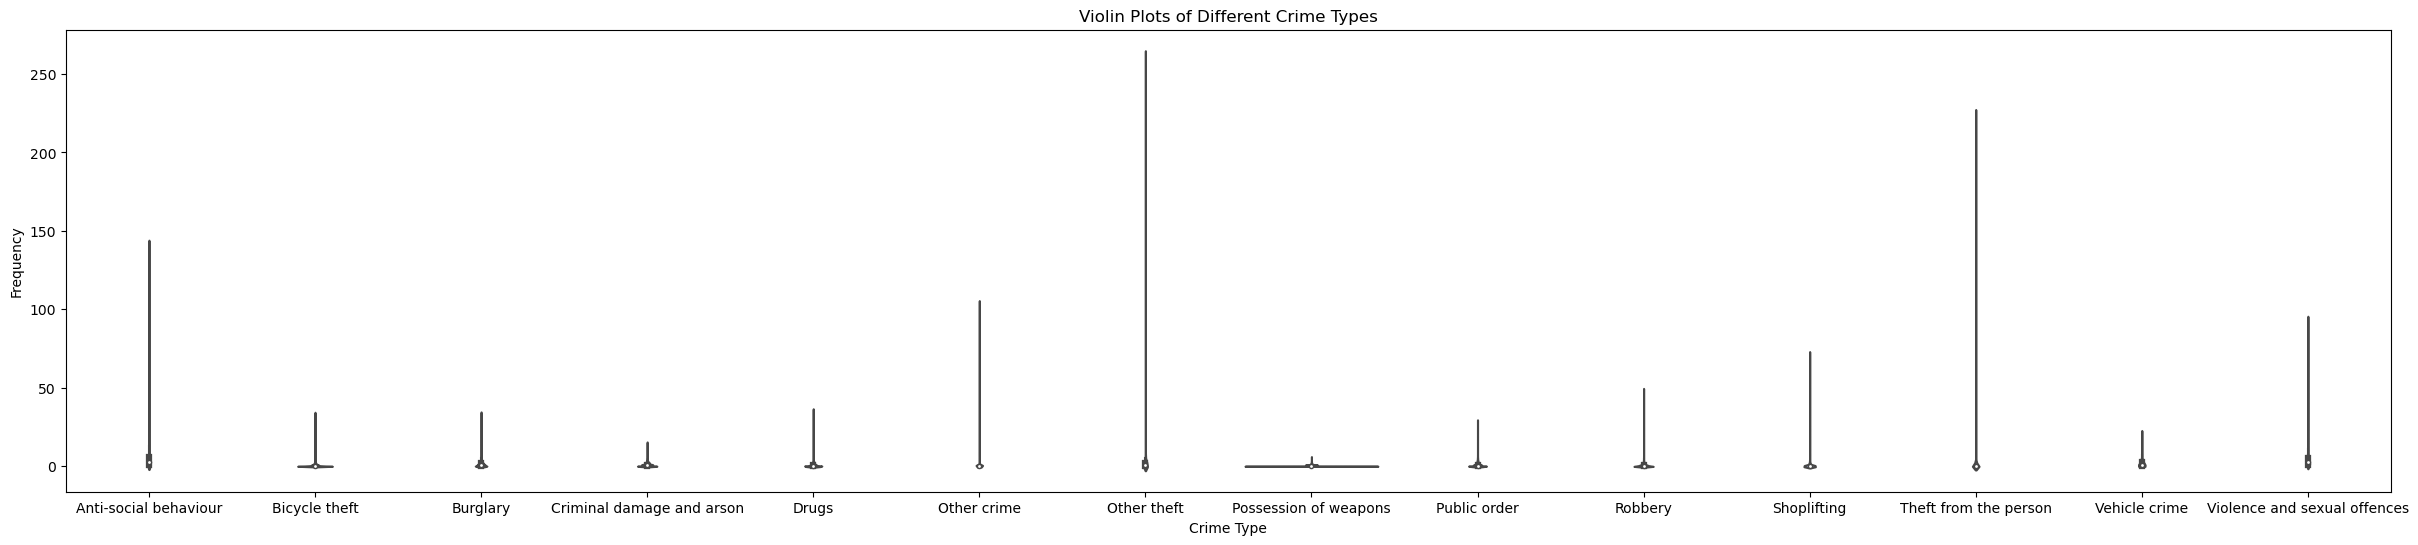

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_types = ['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting', 'Theft from the person', 'Vehicle crime', 'Violence and sexual offences'] 

melted_data = FinalData.melt(value_vars=crime_types, var_name='Crime Type', value_name='Count')

plt.figure(figsize=(30, 6))
sns.violinplot(x='Crime Type', y='Count', data=melted_data)
plt.title('Violin Plots of Different Crime Types')
plt.ylabel('Frequency')
plt.xlabel('Crime Type')

plt.show()

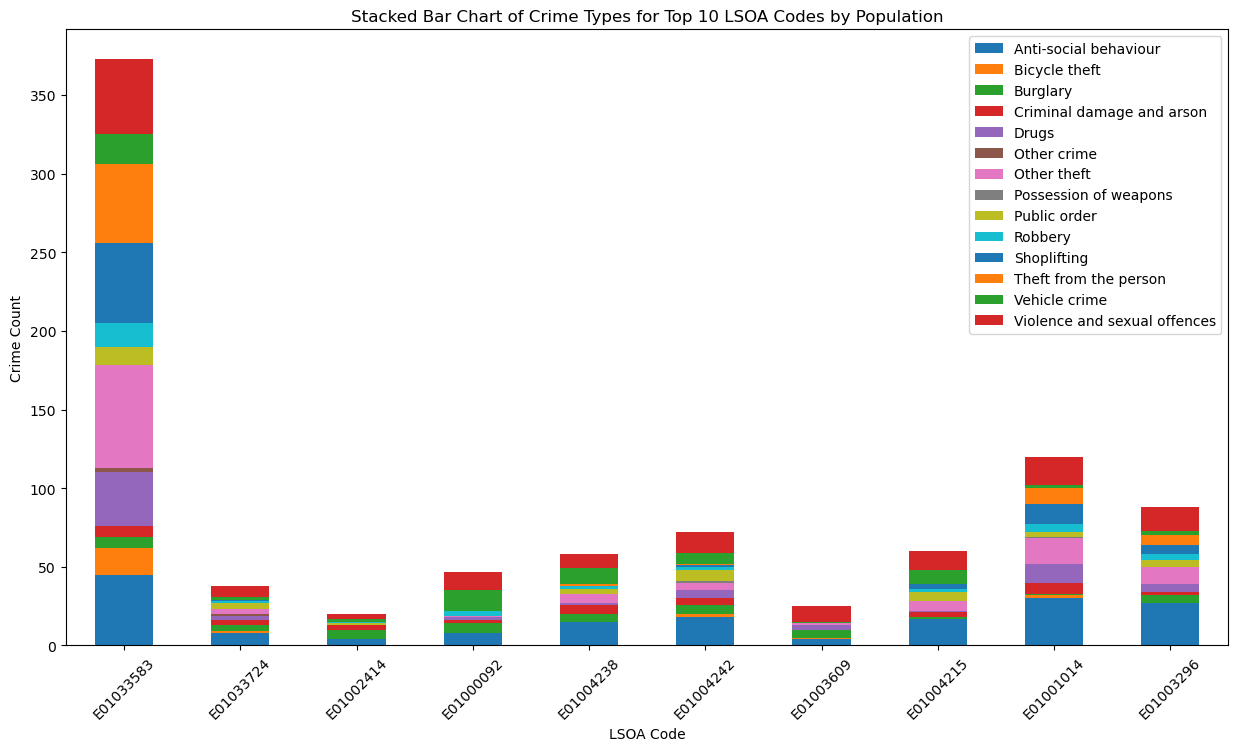

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

crime_types = ['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting', 'Theft from the person', 'Vehicle crime', 'Violence and sexual offences'] 

top_10_lsoa = FinalData.nlargest(10, 'TotPop')

top_10_lsoa.set_index('LSOA code')[crime_types].plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Stacked Bar Chart of Crime Types for Top 10 LSOA Codes by Population')
plt.xlabel('LSOA Code')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)  

plt.show()

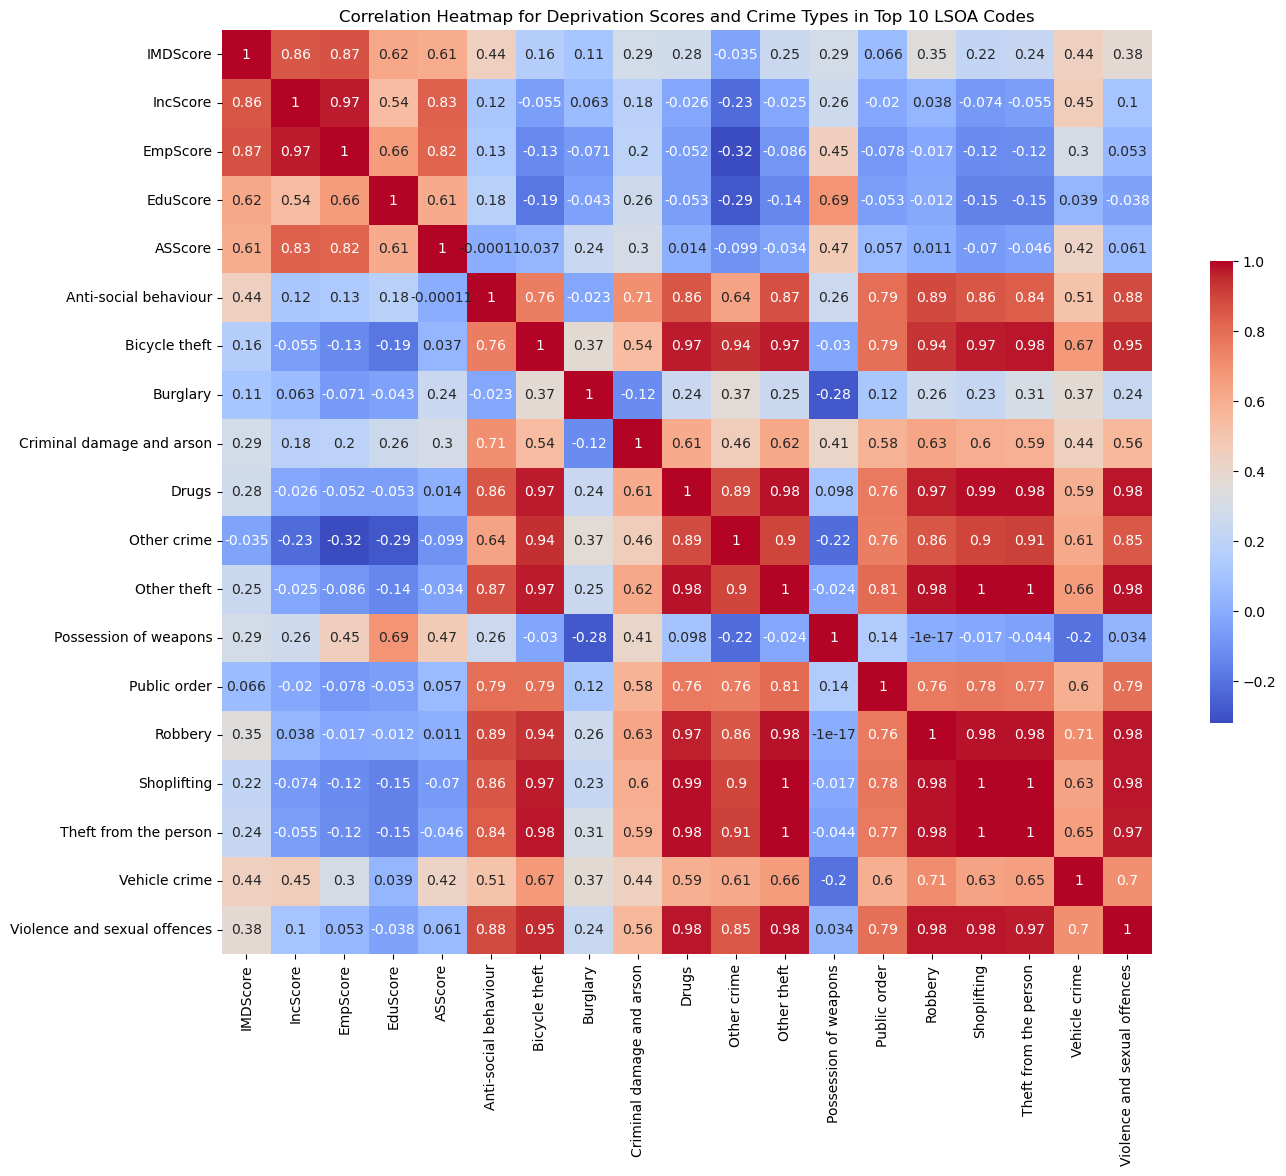

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_10_data = FinalData.nlargest(10, 'TotPop')

deprivation_scores = ['IMDScore', 'IncScore', 'EmpScore', 'EduScore', 'ASScore']
crime_types = ['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting', 'Theft from the person', 'Vehicle crime', 'Violence and sexual offences'] 

correlation_data = top_10_data[deprivation_scores + crime_types]
corr_matrix = correlation_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap for Deprivation Scores and Crime Types in Top 10 LSOA Codes')
plt.show()

Random Forest Mean Squared Error: 499.69940118924313


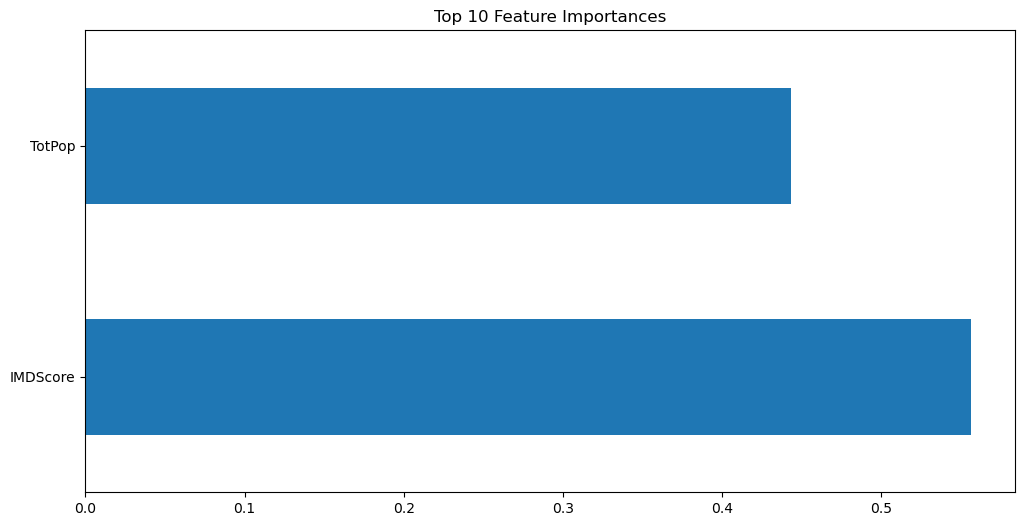

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


X = FinalData[['IMDScore', 'TotPop']]
y = FinalData['Total Crimes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForest_model = RandomForestRegressor(n_estimators=100, random_state=42)

RandomForest_model.fit(X_train, y_train)
predictions_rf = RandomForest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

feature_importances = pd.Series(RandomForest_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(12, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

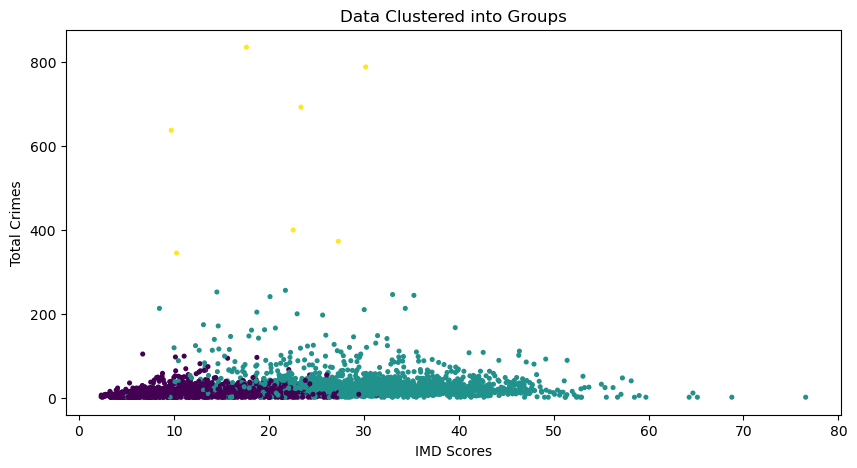

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = FinalData[['IMDScore', 'TotPop', 'Total Crimes']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

FinalData['Cluster'] = clusters

plt.figure(figsize=(10, 5))
plt.scatter(FinalData['IMDScore'], FinalData['Total Crimes'], c=FinalData['Cluster'], s=7)
plt.xlabel('IMD Scores')
plt.ylabel('Total Crimes')
plt.title('Data Clustered into Groups')
plt.show()

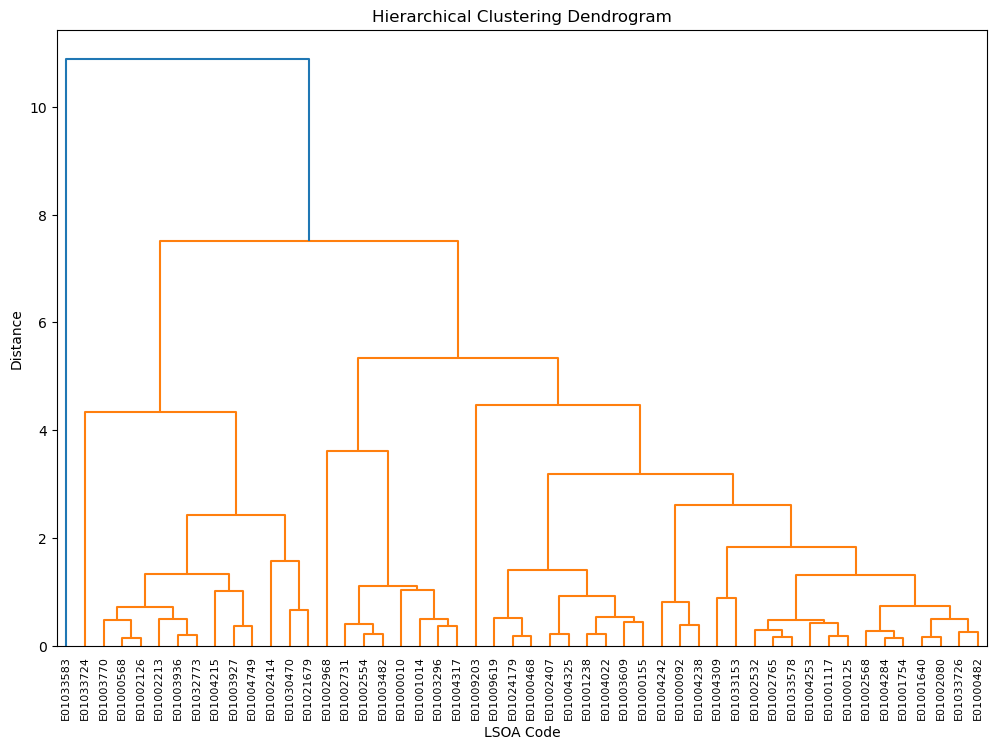

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

top_50 = FinalData.nlargest(50, 'TotPop')

features = top_50[['IMDScore', 'Total Crimes', 'TotPop']] 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Z = linkage(scaled_features, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, labels=top_50['LSOA code'].values, orientation='top', leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('LSOA Code')
plt.ylabel('Distance')
plt.show()